<a href="https://colab.research.google.com/github/BacLuc/try-jupyter/blob/submit-colab/Practical3__MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical 3: MNIST

This is the first task of Practical 3. Your task is to build a (convolutional) neural network to classify the handwritten digits from the MNIST dataset (http://yann.lecun.com/exdb/mnist/). 

You should get an accuracy of **at least 97%** to pass the practical. 

The model files might be too large to be uploaded to GitHub. 
Please use the following link to upload your models: https://seafile.ifi.uzh.ch/u/d/695f63e725b641ed8633/

Name the model file `{repository_name}-MNIST.h5`. For example, if your repository is FDS22-M0, you should name the model file `FDS22-M0-MNIST.h5`. If you are not satisfied with the model you have uploaded, you can upload a new one with the same name. We will only look at the newest model. Nevertheless, try to upload as few times as possible, since the online drive has a limited amount of space. 

## Import the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

In [ ]:
tf.__version__

'2.9.2'

In [ ]:
tf.keras.__version__

'2.9.0'

## Prepare the dataset

In this block, you will prepare the data for the training, such as normalisation. 

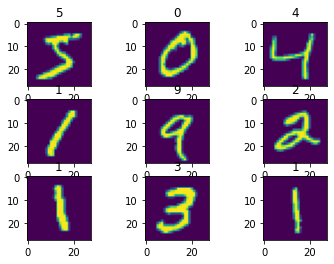

(60000, 28, 28)

In [ ]:
from keras.datasets import mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

for i in range(0,9):
    plt.subplot(330 + 1 + i)
    plt.title(y_train_full[i])
    plt.imshow(X_train_full[i])
plt.show()

X_train_full.shape

In [ ]:
# one-hot encoding
y_train_full = keras.utils.to_categorical(y_train_full, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

print(y_train_full.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [ ]:
# normalisation
X_train_full = X_train_full/255.0
X_test = X_test/255.0

In [ ]:
# get validation dataset
np.random.seed(42) # we set the random seed to make sure everytime the data is shuffled in the same way 
shuffled_indices = np.random.permutation(X_train_full.shape[0])
X_valid, X_train = X_train_full[shuffled_indices[:5000]], X_train_full[shuffled_indices[5000:]]
y_valid, y_train = y_train_full[shuffled_indices[:5000]], y_train_full[shuffled_indices[5000:]]

print(X_train.shape)
print(y_train.shape)

(55000, 28, 28)
(55000, 10)


## Build and train the model

Build and train your model. 

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=X_train.shape[1:]),
    keras.layers.Dense(128, activation="relu", kernel_initializer='he_uniform'),
    keras.layers.Dense(64, activation="relu", kernel_initializer='he_uniform'),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="categorical_crossentropy",
              optimizer=keras.optimizers.Adam(),
              metrics=["accuracy"])

model.build()

# show the structure of your model
print(model.summary())



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history = model.fit(X_train, y_train, batch_size=30, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
1834/1834 [==============================] - 5s 3ms/step - loss: 0.2381 - accuracy: 0.9299 - val_loss: 0.1217 - val_accuracy: 0.9614
Epoch 2/20
1834/1834 [==============================] - 5s 3ms/step - loss: 0.1030 - accuracy: 0.9681 - val_loss: 0.0858 - val_accuracy: 0.9738
Epoch 3/20
1834/1834 [==============================] - 5s 3ms/step - loss: 0.0723 - accuracy: 0.9775 - val_loss: 0.0754 - val_accuracy: 0.9772
Epoch 4/20
1834/1834 [==============================] - 5s 3ms/step - loss: 0.0539 - accuracy: 0.9826 - val_loss: 0.0878 - val_accuracy: 0.9740
Epoch 5/20
1834/1834 [==============================] - 5s 3ms/step - loss: 0.0422 - accuracy: 0.9860 - val_loss: 0.0815 - val_accuracy: 0.9790
Epoch 6/20
1834/1834 [==============================] - 5s 3ms/step - loss: 0.0338 - accuracy: 0.9888 - val_loss: 0.0882 - val_accuracy: 0.9760
Epoch 7/20
1834/1834 [==============================] - 5s 3ms/step - loss: 0.0273 - accuracy: 0.9912 - val_loss: 0.1032 - val_accuracy:

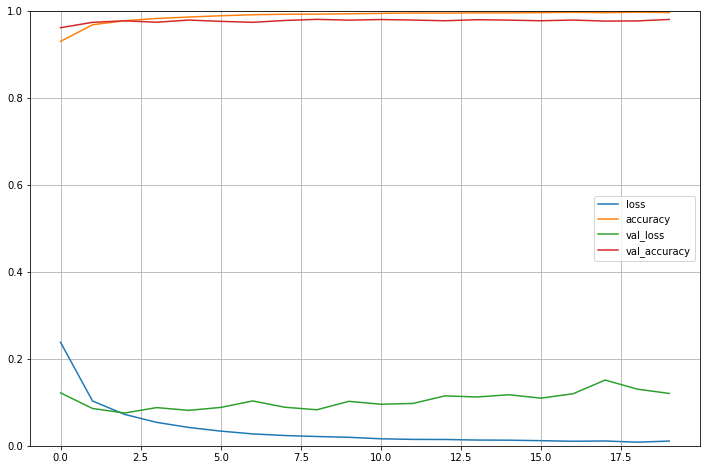

In [ ]:
# Assume you have stored the training history in the variable "history"
# Show the learning curves
pd.DataFrame(history.history).plot(figsize=(12, 8))
plt.gca().set_ylim(0, 1)
plt.grid(True)
plt.show()

## Save the model

Save and upload your trained model to the seafile link we provided to you. You can upload it multiple times. We will consider only the newest uploaded model. 

In [ ]:
model_name = 'FDS22-M033-MNIST.h5'
model.save(model_name)

## Load the model and evaluate it on the test data

In [ ]:
model = keras.models.load_model(model_name)
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.1133 - accuracy: 0.9802


[0.11330903321504593, 0.9801999926567078]

## Short report

Please write a few sentences explaining how you build and train the model. Please include the decisions you made, such as why you use x number layers and the difficulties you met. 

We started with a simplified version of the model in the CNN notebook provided for the practicals. The layers reduce the input size of 28*28 to the final output size of 10, which is the number of classes. We used ReLu as the activation function with HE uniform as the kernel initializer. Only the last layer uses softmax as acitivation function to classify the final values.<br>
This already achieved an accuracy of 98% on the test data set, thus we already
achieved the goal.